# Linear Regression on Height and Weight Dataset
Import the required packages. Numpy to generate line of best fit, Pandas to read the csv file and generate dataframe for train and test, and Matplotlib to scatter plot the predictions against actual outputs 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read data from csv file and generate a dataframe from it

In [2]:
df = pd.read_csv("weight-height.csv")

Display the first 5 entries of the dataframe

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Get dataframe info for datatype and total number of entries

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Get statistical info such as mean, standatard deviation, min, max, etc. for the dataframe

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Import train_test_split from model_selection family of sklearn package. As the name suggests, train_test_split is used to split the dataframe into two parts - training set and testing set. The model is first trained using the training set giving it both the height and weight values. Later the training set is used to make predictions using this model. This is done to determine the accuracy of the model.

In [6]:
from sklearn.model_selection import train_test_split

X is the input variable (also called feature) and y is the output variable (also called label). test_size=0.33 indicates that 33% of the available data is used as the testing set (X_test,y_test) and the rest as training set (X_train,y_train). The split is done randomly, i.e. 3300 of the total 10000 chosen at random is taken as the testing set. random_state=42 is used to ensure that always the same 3300 entries are used for testing. So, although test data is random, no matter how many times this function is executed, the same 3300 entries will be selected.

In [7]:
X = df[['Height']]
y = df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Import LinearRegression from linear_model family of sklearn package.

In [8]:
from sklearn.linear_model import LinearRegression

Create a linear regression model

In [9]:
lr = LinearRegression()

Train the linear regression model using the training set (X_train,y_train)

In [10]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Using unseen dataset X_test (heights) as input to the trained model, make predictions for the corresponding weights

In [11]:
predictions = lr.predict(X_test)

Plot the predicted values against the actual values for corresponding weights. Also plot the regression line (or line of best fit), indicated by the red line. The scatter shows that the predicted values are pretty linear with the actual values. See https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python for generating the regression line.

Text(0.5,1,'Predicted weights vs Actual Weights with Regression line')

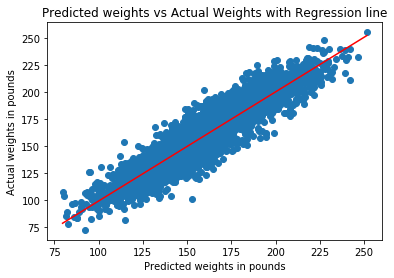

In [12]:
plt.scatter(predictions,y_test)
plt.plot(np.unique(predictions), np.poly1d(np.polyfit(predictions, y_test, 1))(np.unique(predictions)),'-r')
plt.xlabel('Predicted weights in pounds')
plt.ylabel('Actual weights in pounds')
plt.title('Predicted weights vs Actual Weights with Regression line')

Calculate the accuracy of the model. The above model is found to have an accuracy of 85.42% accuracy.

In [13]:
lr.score(X_train,y_train)

0.85420128768053716

Given height in inches, try to predict weight in pounds.
Actual height = 67 inches, and
Actual weight = 171 pounds

In [14]:
lr.predict([[67]])

array([ 166.2680912])

The model predicts a weight of 166.27 pounds which is pretty close to the actual weight.